# Rubik's cube - Meryeme HAMAN | Emilie PATHAMMAVONG 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("train_input_MaPtRPJ(1).csv")
X = df.to_numpy()
X= df.drop(['ID'], axis=1)
df = pd.read_csv("train_output_xd4VV9Q.csv")
y = df.drop(['ID'], axis=1)
print("taille des données:")
print("X:", X.shape)
print("Y:", y.shape)

df = pd.read_csv("test_input_5c0imze(1).csv")
Xtest = df.drop(['ID'], axis=1)
print("test:", Xtest.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.00010)

taille des données:
X: (1837079, 24)
Y: (1837079, 1)
test: (1837080, 24)


### Visualisation des données

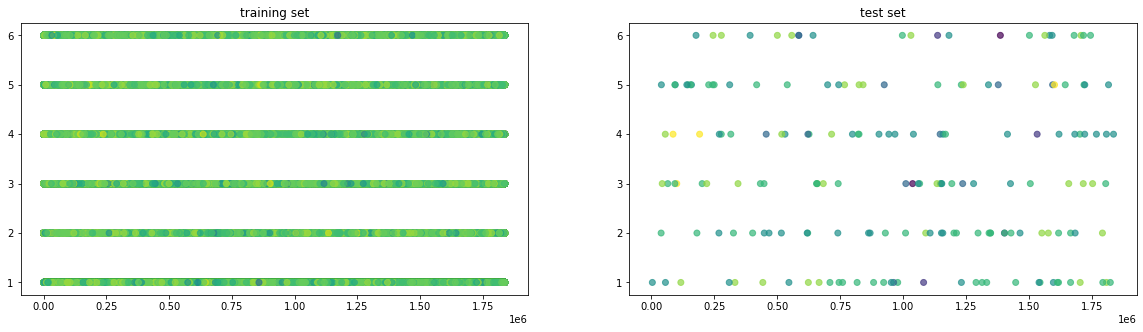

In [3]:
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.title('training set')
plt.scatter(X_train[:,0] , X_train[:,1],  c = y_train, alpha = 0.7);
plt.subplot(1, 2, 2);
plt.scatter(X_test[:,0] , X_test[:,1],  c = y_test, alpha = 0.7);
plt.title('test set')
plt.show()

## Partie 1 : Application des algorithmes vus en cours

### k plus proches voisins, classification naïve bayésienne, arbres de décisions

#### Les scores :

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier(n_neighbors=400)
dtree = DecisionTreeClassifier(criterion="entropy")
nb = GaussianNB()

knn.fit(X_train, y_train)
dtree.fit(X_train, y_train)
nb.fit(X_train, y_train)

print('KNeighbors score : %f' % knn.score(X_test, y_test))
print('Gaussian score : %f' % dtree.score(X_test, y_test))
print('Decision Tree score : %f' % nb.score(X_test, y_test))

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KNeighbors score : 0.391304
Gaussian score : 0.244565
Decision Tree score : 0.391304


#### Matrice de confusion 

Text(0.5, 1.0, 'classification naïve bayésienne')

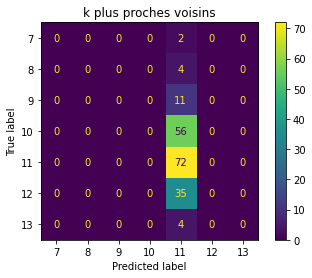

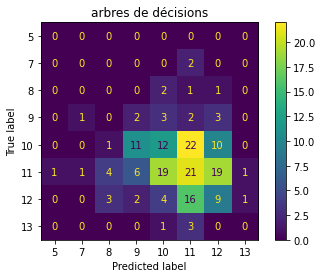

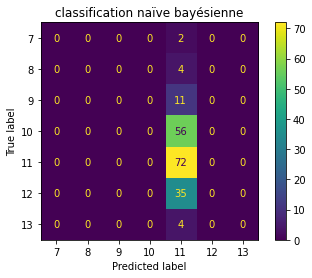

In [7]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test, y_test)
plt.title("k plus proches voisins")
plot_confusion_matrix(dtree,X_test, y_test)
plt.title("arbres de décisions")
plot_confusion_matrix(nb,X_test, y_test)
plt.title("classification naïve bayésienne")

#### Predictions

In [8]:
##my_prediction_knn = knn.predict(Xtest)
##my_prediction_dtree = dtree.predict(Xtest)
my_prediction_nb = nb.predict(Xtest)

#### Output files 

In [ ]:
import re 
with open('predictions/prediction_nb_1.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my_prediction_nb[ count - 1837079]))+'\n')
        count +=1

### Réseaux de neurones artificiels

In [46]:
from sklearn.neural_network import MLPClassifier 
ann= MLPClassifier(hidden_layer_sizes=(100, ),max_iter=10,alpha=1e-4, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)
ann.fit(X_train, y_train)
print('neural score : %f' % ann.score(X_test, y_test))

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.54254532
Iteration 2, loss = 1.53700598
Iteration 3, loss = 1.53695951
Iteration 4, loss = 1.53691235
Iteration 5, loss = 1.53690585
Iteration 6, loss = 1.53684783
Iteration 7, loss = 1.53687862
Iteration 8, loss = 1.53688279
Iteration 9, loss = 1.53689296
Iteration 10, loss = 1.53688700
neural score : 0.347826


C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Matrice de confusion

Text(0.5, 1.0, 'k plus proches voisins')

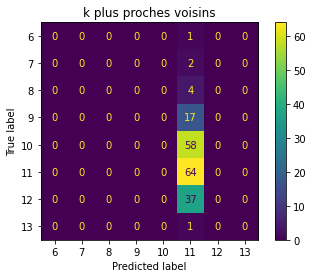

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ann,X_test, y_test)
plt.title("k plus proches voisins")

# Partie 2 : Algorithmes non vus en cours

### Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model2=LinearDiscriminantAnalysis()
model2.fit(X_train, y_train)
print('regressor score : %f' % model2.score(X_test, y_test))

###  Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
est_Ensemble = VotingClassifier(estimators=[('nb', nb), ('RF', ann1)],
                        voting='soft',
                        weights=[1, 1])

score_Ensemble=est_Ensemble.fit(X_train,y_train).score(X_test,y_test)
score_Ensemble

### XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
model = XGBClassifier(num_class=7,
                                  learning_rate=0.1,
                                  num_iterations=1,
                                  max_depth=10,
                                  feature_fraction=0.7, 
                                  scale_pos_weight=1.5,
                                  boosting='gbdt',
                                  metric='multiclass',
                                  eval_metric='mlogloss')
model.fit(X_train, y_train)
print('xgbost score : %f' % model.score(X_test, y_test))

### Testés mais sans aucun résultat

## SVC

In [ ]:
from sklearn import svm
clf= svm.SVC()
clf.fit(X_train, y_train)
print('regressor score : %f' % clf.score(X_test, y_test))

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
est_AB = AdaBoostClassifier()
score_AB=est_AB.fit(X_train,y_train).score(X_test,y_test)

est_RF = RandomForestClassifier()
score_RF=est_RF.fit(X_train,y_train).score(X_test,y_test)

est_Ensemble = VotingClassifier(estimators=[('AB', est_AB), ('RF', est_RF)],
                        voting='soft',
                        weights=[1, 1])

score_Ensemble=est_Ensemble.fit(X_train,y_train).score(X_test,y_test)

# Partie 3 : Traitement des données

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


df = pd.read_csv("train_input_MaPtRPJ(1).csv")
##X = df.iloc[:,1:].values
input=df.to_numpy()
X=input[:,1:]
df = pd.read_csv("train_output_xd4VV9Q.csv")
##y = df.iloc[:,1:].values
output=df.to_numpy()
y=output[:,1:].reshape(-1)
print("taille des données:")
print("X:", X.shape)
print("Y:", y.shape)

df = pd.read_csv("test_input_5c0imze(1).csv")
Xtest = df.iloc[:,1:].values
print("test:", Xtest.shape)

taille des données:
X: (1837079, 24)
Y: (1837079,)
test: (1837080, 24)


In [49]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
def confu(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test) 
    print('Train score : %f' % model.score(X_train, y_train))
    print('Test score : %f' % model.score(X_test, y_test))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

## Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.01)

# Les différentes classes 

In [14]:
y_unique, count_classes = np.unique(y, return_counts=True)
print("Les différentes classes sont \n", y_unique)
print("Le nombre des observations pour chaque classe \n", count_classes)

Les différentes classes sont 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Le nombre des observations pour chaque classe 
 [     3     13     60    267   1128   4485  16529  57074 180254 465294
 675426 391268  45140    138]


## Distrisbution des observations par rapport à la classe

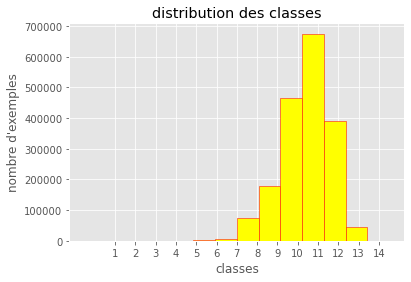

In [15]:
plt.style.use('ggplot')
plt.xticks(y_unique)
plt.hist(y, range = (-.5, 14.5), bins=14, color='yellow', align='mid',edgecolor='red')
plt.xlabel('classes')
plt.ylabel('nombre d\'exemples')
plt.title('distribution des classes')
plt.show()

## Les observations de chaque classe

In [16]:
y_1=[] 
X_1=[]
y_2=[] 
X_2=[]
y_3=[] 
X_3=[]
y_4=[] 
X_4=[]
y_5=[] 
X_5=[]
y_6=[] 
X_6=[]
y_7=[] 
X_7=[]
y_8=[] 
X_8=[]
y_9=[] 
X_9=[]
y_10=[] 
X_10=[]
y_11=[] 
X_11=[]
y_12=[] 
X_12=[]
y_13=[] 
X_13=[]
y_14=[] 
X_14=[]

for j in range(len(y)):
    if y[j]==y_unique[0]:
        y_1.append(y[j])
        X_1.append(X[j])
    elif y[j]==y_unique[1]:
        y_2.append(y[j])
        X_2.append(X[j])
    elif y[j]==y_unique[2]:
        y_3.append(y[j])
        X_3.append(X[j])
    elif y[j]==y_unique[3]:
        y_4.append(y[j])
        X_4.append(X[j])
    elif y[j]==y_unique[4]:
        y_5.append(y[j])
        X_5.append(X[j])
    elif y[j]==y_unique[5]:
        y_6.append(y[j])
        X_6.append(X[j])
    elif y[j]==y_unique[6]:
        y_7.append(y[j])
        X_7.append(X[j])
    elif y[j]==y_unique[7]:
        y_8.append(y[j])
        X_8.append(X[j])
    elif y[j]==y_unique[8]:
        y_9.append(y[j])
        X_9.append(X[j])
    elif y[j]==y_unique[9]:
        y_10.append(y[j])
        X_10.append(X[j])
    elif y[j]==y_unique[10]:
        y_11.append(y[j])
        X_11.append(X[j])
    elif y[j]==y_unique[11]:
        y_12.append(y[j])
        X_12.append(X[j])
    elif y[j]==y_unique[12]:
        y_13.append(y[j])
        X_13.append(X[j])
    elif y[j]==y_unique[13]:
        y_14.append(y[j])
        X_14.append(X[j])
y_1=np.array(y_1)
X_1=np.array(X_1)
y_2=np.array(y_2)
X_2=np.array(X_2)
y_3=np.array(y_3)
X_3=np.array(X_3)
y_4=np.array(y_4)
X_4=np.array(X_4)
y_5=np.array(y_5)
X_5=np.array(X_5)
y_6=np.array(y_6)
X_6=np.array(X_6)
y_7=np.array(y_7)
X_7=np.array(X_7)
y_8=np.array(y_8)
X_8=np.array(X_8)
y_9=np.array(y_9)
X_9=np.array(X_9)
y_10=np.array(y_10)
X_10=np.array(X_10)
y_11=np.array(y_11)
X_11=np.array(X_11)
y_12=np.array(y_12)
X_12=np.array(X_12)
y_13=np.array(y_13)
X_13=np.array(X_13)
y_14=np.array(y_14)
X_14=np.array(X_14)


## Identification des patterns

### Traitement des données ayant les Pos5, Pos15 et Pos18 égales respectivement 1, 2 et 3

13638
13638
[1 2 6 2 1 1 6 6 3 3 4 1 2 4 4 2 4 6 3 3 5 5 5 5]
8


(array([  11.,    9.,   19.,  180.,  279.,  704., 4882., 4509., 2659.,
         386.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

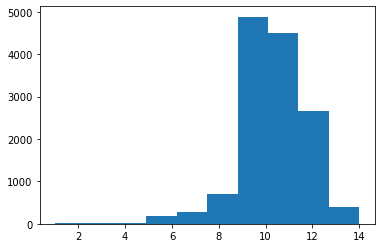

In [51]:
# Extraction des lignes avec les colonnes 5=1;15=2; 18=3
y_5_15_18=[] 

X_5_15_18=[]

for j in range(len(X)):
    if X[j,5] == 1 and X[j,15]==2 and X[j,18]==3:
         y_5_15_18.append(y[j])
         X_5_15_18.append(X[j])
    
y_5_15_18=np.array(y_5_15_18)
X_5_15_18=np.array(X_5_15_18)
print(len(y_5_15_18))
print(len(X_5_15_18))
print(X_5_15_18[1])
print(y_5_15_18[1])
plt.hist(y_5_15_18)

### Split 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X_5_15_18, y_5_15_18, test_size=0.01, random_state=42)

### Knn

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 75, metric='manhattan')
confu(knn)

Train score : 0.386638
Test score : 0.306569
[[ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  1  9  0  0]
 [ 0  0  0  0  3 18  1  0]
 [ 0  0  0  0  4 28  0  0]
 [ 0  0  0  0  7 35  0  0]
 [ 0  0  0  0  3 18  3  0]
 [ 0  0  0  0  0  2  0  0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        22
          10       0.22      0.12      0.16        32
          11       0.30      0.83      0.45        42
          12       0.75      0.12      0.21        24
          13       0.00      0.00      0.00         2

    accuracy                           0.31       137
   macro avg       0.16      0.14      0.10       137
weighted avg       0.28      0.31      0.21       137



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
confu(nb)

Train score : 0.330642
Test score : 0.306569
[[ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0 32  0  0]
 [ 0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  2  0  0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00        32
          11       0.31      1.00      0.47        42
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00         2

    accuracy                           0.31       137
   macro avg       0.04      0.12      0.06       137
weighted avg       0.09      0.31      0.14       137



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### MLP

In [8]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, ),max_iter=10,alpha=1e-4, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

In [13]:
confu(clf)

Train score : 0.073171
Test score : 0.000000
[[0 1]
 [0 0]]
              precision    recall  f1-score   support

           9       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined 

### Suppression des positions 5, 6, 14, 15, 18, 22

In [24]:
Xct= np.delete(X_5_15_18,[5,6,14,15,18,22],1) ##6,14,22 commun
#for i in range(10):
#   print(Xct[i])
X_train, X_test, y_train, y_test = train_test_split(Xct, y_5_15_18, test_size=0.01, random_state=42)

### Traitement des données après la suppression

### Knn

In [25]:
confu(knn)

Train score : 0.386638
Test score : 0.306569
[[ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  1  9  0  0]
 [ 0  0  0  0  3 18  1  0]
 [ 0  0  0  0  4 28  0  0]
 [ 0  0  0  0  7 35  0  0]
 [ 0  0  0  0  3 18  3  0]
 [ 0  0  0  0  0  2  0  0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        22
          10       0.22      0.12      0.16        32
          11       0.30      0.83      0.45        42
          12       0.75      0.12      0.21        24
          13       0.00      0.00      0.00         2

    accuracy                           0.31       137
   macro avg       0.16      0.14      0.10       137
weighted avg       0.28      0.31      0.21       137



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bayes

In [26]:
confu(nb)

Train score : 0.330642
Test score : 0.306569
[[ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0 32  0  0]
 [ 0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  2  0  0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00        32
          11       0.31      1.00      0.47        42
          12       0.00      0.00      0.00        24
          13       0.00      0.00      0.00         2

    accuracy                           0.31       137
   macro avg       0.04      0.12      0.06       137
weighted avg       0.09      0.31      0.14       137



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### MLP

In [27]:
confu(clf)

Train score : 0.331309
Test score : 0.313869
[[ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0 32  0  0]
 [ 0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0 23  1  0]
 [ 0  0  0  0  0  2  0  0]]
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00        32
          11       0.31      1.00      0.47        42
          12       1.00      0.04      0.08        24
          13       0.00      0.00      0.00         2

    accuracy                           0.31       137
   macro avg       0.16      0.13      0.07       137
weighted avg       0.27      0.31      0.16       137



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Traitement des observations dont la classe est 10, 11 ou 12

In [29]:
X_10_11_12 = np.vstack((X_10,X_11,X_12))
y_10_11_12 = np.hstack((y_10,y_11,y_12))
print(len(y_10_11_12))
print(y_10_11_12[0])
print(y_10_11_12[1531988-1])

1531988
10
12


#### Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_10_11_12, y_10_11_12, test_size=0.01, random_state=42)

#### MLP

In [32]:
confu(clf)

Train score : 0.440819
Test score : 0.446997
[[   0 4675    0]
 [   0 6848    0]
 [   0 3797    0]]
              precision    recall  f1-score   support

          10       0.00      0.00      0.00      4675
          11       0.45      1.00      0.62      6848
          12       0.00      0.00      0.00      3797

    accuracy                           0.45     15320
   macro avg       0.15      0.33      0.21     15320
weighted avg       0.20      0.45      0.28     15320



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Bayes

In [33]:
confu(nb)

Train score : 0.440820
Test score : 0.446997
[[   0 4675    0]
 [   0 6848    0]
 [   0 3797    0]]
              precision    recall  f1-score   support

          10       0.00      0.00      0.00      4675
          11       0.45      1.00      0.62      6848
          12       0.00      0.00      0.00      3797

    accuracy                           0.45     15320
   macro avg       0.15      0.33      0.21     15320
weighted avg       0.20      0.45      0.28     15320



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Supression des colonnes

In [35]:
Xct=np.delete(X_10_11_12,[6,14,22],1) ##6,14,22 commun


In [36]:
X_train, X_test, y_train, y_test = train_test_split(Xct, y_10_11_12, test_size=0.01, random_state=42)

### MLP

In [37]:
confu(clf)

Train score : 0.440819
Test score : 0.446997
[[   1 4674    0]
 [   1 6847    0]
 [   0 3797    0]]
              precision    recall  f1-score   support

          10       0.50      0.00      0.00      4675
          11       0.45      1.00      0.62      6848
          12       0.00      0.00      0.00      3797

    accuracy                           0.45     15320
   macro avg       0.32      0.33      0.21     15320
weighted avg       0.35      0.45      0.28     15320



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Traitement équitable

In [41]:
X_10_11_12 = np.vstack((X_10[0:391267,:],X_11[0:391267,:],X_12[0:391267,:]))
y_10_11_12 = np.hstack((y_10[0:391267],y_11[0:391267],y_12[0:391267]))
X_train, X_test, y_train, y_test = train_test_split(X_10_11_12, y_10_11_12, test_size=0.01, random_state=42)

#### MLP

In [42]:
confu(clf)

Train score : 0.333290
Test score : 0.336656
[[3950    2    8]
 [3937    0    9]
 [3830    1    2]]
              precision    recall  f1-score   support

          10       0.34      1.00      0.50      3960
          11       0.00      0.00      0.00      3946
          12       0.11      0.00      0.00      3833

    accuracy                           0.34     11739
   macro avg       0.15      0.33      0.17     11739
weighted avg       0.15      0.34      0.17     11739



### Traitement des données restantes

In [44]:
X_train =X_10[391267:465294,:]
y_train =y_10[391267:465294]

In [45]:
confu(clf)

Train score : 1.000000
Test score : 0.337337
[[3960    0    0]
 [3946    0    0]
 [3833    0    0]]
              precision    recall  f1-score   support

          10       0.34      1.00      0.50      3960
          11       0.00      0.00      0.00      3946
          12       0.00      0.00      0.00      3833

    accuracy                           0.34     11739
   macro avg       0.11      0.33      0.17     11739
weighted avg       0.11      0.34      0.17     11739



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Traitement des observations dont la classe est 8, 9 ou 13

In [46]:
X_8_9_13 = np.vstack((X_8,X_9,X_13))
y_8_9_13 = np.hstack((y_8,y_9,y_13))
print(len(y_8_9_13))
print(y_8_9_13[0])
print(y_8_9_13[282468-1])

282468
8
13


#### split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_8_9_13, y_8_9_13, test_size=0.01, random_state=42)

#### Knn

In [51]:
confu(clf)

Train score : 0.638275
Test score : 0.624779
[[   0  603    0]
 [   0 1765    0]
 [   0  457    0]]
              precision    recall  f1-score   support

           8       0.00      0.00      0.00       603
           9       0.62      1.00      0.77      1765
          13       0.00      0.00      0.00       457

    accuracy                           0.62      2825
   macro avg       0.21      0.33      0.26      2825
weighted avg       0.39      0.62      0.48      2825



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Traitement des observations dont la classe est 1, 2, 3, 4, 5, 6, 7 ou 14

In [52]:
X_1_2_3_4_5_6_7_14 = np.vstack((X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_14))
y_1_2_3_4_5_6_7_14 = np.hstack((y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_14))
print(len(y_1_2_3_4_5_6_7_14))
print(y_1_2_3_4_5_6_7_14[0])
print(y_1_2_3_4_5_6_7_14[22623-1])
print(len(y_1_2_3_4_5_6_7_14)+len(y_10_11_12)+len(y_8_9_13))
print(len(y))

22623
1
14
1478892
1837079


#### Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_1_2_3_4_5_6_7_14, y_1_2_3_4_5_6_7_14, test_size=0.01, random_state=42)

#### MLP

In [54]:
confu(clf)

Train score : 0.730309
Test score : 0.762115
[[  0   0   0   6   0]
 [  0   0   0   9   0]
 [  0   0   0  38   0]
 [  0   0   0 173   0]
 [  0   0   0   1   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00        38
           7       0.76      1.00      0.87       173
          14       0.00      0.00      0.00         1

    accuracy                           0.76       227
   macro avg       0.15      0.20      0.17       227
weighted avg       0.58      0.76      0.66       227



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Clusters

In [ ]:
from sklearn.cluster import KMeans
k=14
km = KMeans(n_clusters=k, init='random')
y = km.fit_predict(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [ ]:
clf.fit(X_train, y_train)
print('nb accuracy for train set: %f' % clf.score(X_test, y_test))

In [ ]:
my_prediction_knn= nb.predict(Xtest)
import re 
with open('predictions/my_prediction_nb_2.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my_prediction_knn[ count - 1837079]))+'\n')
        count +=1

## Amélioration des données 

### Solution 1 : Définition des faces et diminution des colonnes de X selon les couleurs

In [56]:
f=[] # front face
b=[] # back face
l=[] # left face
r=[] # right face
u=[] # up face
d=[] # down face
for i in range(len(X)):
    f.append(len(np.unique([X[i,18],X[i,17],X[i,19],X[i,16]])))
    b.append(len(np.unique([X[i,21],X[i,22],X[i,20],X[i,23]])))
    l.append(len(np.unique([X[i,1],X[i,5],X[i,0],X[i,4]])))
    r.append(len(np.unique([X[i,2],X[i,6],X[i,3],X[i,7]])))
    u.append(len(np.unique([X[i,14],X[i,13],X[i,10],X[i,9]])))
    d.append(len(np.unique([X[i,11],X[i,8],X[i,15],X[i,12]])))
f=(np.matrix(f)).T
b=(np.matrix(b)).T
l=(np.matrix(l)).T
r=(np.matrix(r)).T
u=(np.matrix(u)).T
d=(np.matrix(d)).T
Xcp=np.hstack((f,b,l,r,u,d))

In [57]:
print(Xcp.shape)

(1837079, 6)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(Xcp, y, test_size=0.01, random_state=42)

In [59]:
confu(clf)

Train score : 0.096240
Test score : 0.094333
[[ 22   0   0 479 371   0   0   0   0   0 211 124 143   0]
 [ 23   0   0 519 262   0   0   4   0   0 223 167 133   0]
 [  7   0   0 438 244   0   0   4   0   0 284 256  89   0]
 [ 24   0   0 563 262   0   0   5   0   0 169 159 147   0]
 [ 18   0   0 337 408   0   0   4   0   0 207 124 157   0]
 [ 16   0   0 405 344   0   0   5   0   0 217 167 112   0]
 [ 16   0   0 500 284   0   0   8   0   0 185 163 125   0]
 [ 20   0   0 381 324   0   0   3   0   0 293 198 101   0]
 [ 12   0   0 428 283   0   0   6   0   0 272 198  80   0]
 [ 18   0   0 462 266   0   0   0   0   0 212 178 115   0]
 [ 16   0   0 354 313   0   0   2   0   0 355 205  97   0]
 [ 10   0   0 495 215   0   0   4   0   0 341 235 101   0]
 [ 16   0   0 497 330   0   0   5   0   0 204 129 147   0]
 [ 23   0   0 473 274   0   0   2   0   0 226 203 115   0]]
              precision    recall  f1-score   support

           0       0.09      0.02      0.03      1350
           1       

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Définition des faces et diminution des colonnes de Xtest selon les couleurs

In [60]:
f=[] # front face
b=[] # back face
l=[] # left face
r=[] # right face
u=[] # up face
d=[] # down face
for i in range(len(Xtest)):
    f.append(len(np.unique([Xtest[i,18],Xtest[i,17],Xtest[i,19],Xtest[i,16]])))
    b.append(len(np.unique([Xtest[i,21],Xtest[i,22],Xtest[i,20],Xtest[i,23]])))
    l.append(len(np.unique([Xtest[i,1],Xtest[i,5],Xtest[i,0],Xtest[i,4]])))
    r.append(len(np.unique([Xtest[i,2],Xtest[i,6],Xtest[i,3],Xtest[i,7]])))
    u.append(len(np.unique([Xtest[i,14],Xtest[i,13],Xtest[i,10],Xtest[i,9]])))
    d.append(len(np.unique([Xtest[i,11],Xtest[i,8],Xtest[i,15],Xtest[i,12]])))
f=(np.matrix(f)).T
b=(np.matrix(b)).T
l=(np.matrix(l)).T
r=(np.matrix(r)).T
u=(np.matrix(u)).T
d=(np.matrix(d)).T
Xtest=np.hstack((f,b,l,r,u,d))

### Solution 2 : Équilibrer les poids des classes 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(class_weight="balanced")
rfc.fit(X_train, y_train)
score=rfc.score(X_test, y_test)
score
## MemoryError

### Solution 3 :  Class Weights 

In [ ]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Calling function 
conf_matrix(y_test, pred_test)

In [25]:
from sklearn.utils import class_weight


class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(y),
                                                  y)

# Convert class_weights to a dictionary to pass it to class_weight in model.fit
class_weights = dict(enumerate(class_weights))

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14], y=[11 11 11 ... 12 11 11] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [26]:
class_weights

{0: 43739.97619047619,
 1: 10093.84065934066,
 2: 2186.9988095238095,
 3: 491.4604066345639,
 4: 116.32972391084093,
 5: 29.25750915750916,
 6: 7.938769954106635,
 7: 2.29911918862229,
 8: 0.7279723532982822,
 9: 0.2820150884632696,
 10: 0.19427728362756033,
 11: 0.3353709696970582,
 12: 2.9069545540857016,
 13: 950.8690476190476}

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight={ 1: 43739.97619047619, 2: 10093.84065934066, 3: 2186.9988095238095,4: 491.4604066345639,5: 116.32972391084093, 6: 29.25750915750916,7: 7.938769954106635,8: 2.29911918862229,9: 0.7279723532982822,10: 0.2820150884632696, 11: 0.19427728362756033,12: 0.3353709696970582,13: 2.9069545540857016,14: 950.8690476190476})
confu(lr)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train score : 0.058994
Test score : 0.058952
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    2    1    0    0    0    0    0    0    0    0    1    0    0]
 [   1    1    1    2    1    0    1    0    0    1    0    2    0    3]
 [   0    7    6    6    2    2    1    0    0    1    1    6    1   14]
 [   0   14   21   16   10    6    9    0    1    0    4   27    3   52]
 [   2   48   96   53   35   15   15    2    6    7   12   98   22  154]
 [   2  160  270  169   98   28   36   20    6   31   52  329   81  519]
 [   5  421  711  457  273   70  116   40   27   60  146  884  220 1255]
 [  10  590  980  657  385  112  180   50   41   93  178 1329  305 1845]
 [   6  344  572  366  203   63   92   32   20   60  114  804  178 1029]
 [   1   39   61   30   31    8    8    2    4    6   12   89   21  142]
 [   0

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
my=lr.predict(Xtest)

In [35]:
my=lr.predict(Xtest)
import re 
with open('predictions/LR.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my[ count - 1837079]))+'\n')
        count +=1

### Solution 4 : Deep Learning

In [52]:
from imblearn.under_sampling import RandomUnderSampler

a = RandomUnderSampler()
X_sm, y_sm = a.fit_resample(X, y)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.01, random_state=42)

In [54]:
confu(clf)

Iteration 1, loss = 2.72886329
Iteration 2, loss = 2.71908097
Iteration 3, loss = 2.65356599
Iteration 4, loss = 2.60849143
Iteration 5, loss = 2.52338637
Iteration 6, loss = 2.52534680
Iteration 7, loss = 3.05101827
Iteration 8, loss = 2.73081910
Iteration 9, loss = 2.56122071
Iteration 10, loss = 2.48853174
Iteration 11, loss = 2.36165101
Iteration 12, loss = 2.75993432
Iteration 13, loss = 3.95520123
Iteration 14, loss = 2.67260731
Iteration 15, loss = 2.60720491
Iteration 16, loss = 2.55882832
Iteration 17, loss = 2.51240788
Iteration 18, loss = 2.45785708
Iteration 19, loss = 2.64760177
Iteration 20, loss = 2.99672322
Iteration 21, loss = 2.64728134
Iteration 22, loss = 2.63227781
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Train score : 0.073171
Test score : 0.000000
[[0 0]
 [1 0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00   

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

### Solution 4 : Preprocessing

#### One hot encoder

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("pos0", OneHotEncoder(), [0]),("pos1", OneHotEncoder(), [1]),("pos2", OneHotEncoder(), [2]),("pos3", OneHotEncoder(), [3]),("pos4", OneHotEncoder(), [4]),("pos5", OneHotEncoder(), [5]),("pos6", OneHotEncoder(), [6]),("pos7", OneHotEncoder(), [7]),("pos8", OneHotEncoder(), [8]),("pos9", OneHotEncoder(), [9]),("pos10", OneHotEncoder(), [10]),("pos11", OneHotEncoder(), [11]),("pos12", OneHotEncoder(), [12]),("pos13", OneHotEncoder(), [13]),("pos14", OneHotEncoder(), [14]),("pos15", OneHotEncoder(), [15]),("pos16", OneHotEncoder(), [16]),("pos17", OneHotEncoder(), [17]),("pos18", OneHotEncoder(), [18]),("pos19", OneHotEncoder(), [19]),("pos20", OneHotEncoder(), [20]),("pos21", OneHotEncoder(), [21]),("pos22", OneHotEncoder(), [22]),("pos23", OneHotEncoder(), [23])], remainder = 'passthrough')
X_en = ct.fit_transform(X)
Xtest_en=ct.fit_transform(Xtest)

In [57]:
print(X_en[0:,])

  (0, 3)	1.0
  (0, 6)	1.0
  (0, 12)	1.0
  (0, 18)	1.0
  (0, 29)	1.0
  (0, 31)	1.0
  (0, 36)	1.0
  (0, 42)	1.0
  (0, 47)	1.0
  (0, 52)	1.0
  (0, 56)	1.0
  (0, 62)	1.0
  (0, 71)	1.0
  (0, 78)	1.0
  (0, 79)	1.0
  (0, 83)	1.0
  (0, 86)	1.0
  (0, 94)	1.0
  (0, 100)	1.0
  (0, 108)	1.0
  (0, 111)	1.0
  (0, 118)	1.0
  (0, 122)	1.0
  (0, 125)	1.0
  (1, 5)	1.0
  :	:
  (1837077, 123)	1.0
  (1837078, 2)	1.0
  (1837078, 6)	1.0
  (1837078, 15)	1.0
  (1837078, 19)	1.0
  (1837078, 24)	1.0
  (1837078, 34)	1.0
  (1837078, 36)	1.0
  (1837078, 40)	1.0
  (1837078, 48)	1.0
  (1837078, 50)	1.0
  (1837078, 59)	1.0
  (1837078, 63)	1.0
  (1837078, 69)	1.0
  (1837078, 78)	1.0
  (1837078, 79)	1.0
  (1837078, 80)	1.0
  (1837078, 89)	1.0
  (1837078, 96)	1.0
  (1837078, 98)	1.0
  (1837078, 109)	1.0
  (1837078, 111)	1.0
  (1837078, 117)	1.0
  (1837078, 122)	1.0
  (1837078, 125)	1.0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_en,y, test_size=0.01, random_state=42)

In [79]:
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Train score : 0.367681
Test score : 0.365631
[[   0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    1    9    0    0    0]
 [   0    0    0    0    0    0    0   55    0    0    0]
 [   0    0    0    0    0    0    0  164    0    0    0]
 [   0    0    0    0    0    0    0  567    0    0    0]
 [   0    0    0    0    0    0    0 1847    0    0    0]
 [   0    0    0    0    0    0    0 4683    0    0    0]
 [   0    0    0    0    0    0    1 6717    0    0    0]
 [   0    0    0    0    0    0    0 3878    0    0    0]
 [   0    0    0    0    0    0    0  447    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00       164
           8       0.00      0.00      0.00  

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
my=clf.predict(Xtest_en)
import re 
with open('predictions/clf_ohe.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my[ count - 1837079]))+'\n')
        count +=1

In [80]:
X.shape

(1837079, 129)

#### Min Max scaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler1= scaler.fit_transform(X)
scaler2= scaler.fit_transform(Xtest)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(scaler1,y, test_size=0.01, random_state=42)

In [59]:
my=clf.predict(Xtest)
import re 
with open('predictions/clf.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my[ count - 1837079]))+'\n')
        count +=1

In [57]:
confu(clf)

Train score : 0.367683
Test score : 0.365685
[[   0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0   10    0    0    0]
 [   0    0    0    0    0    0    0   55    0    0    0]
 [   0    0    0    0    0    0    0  164    0    0    0]
 [   0    0    0    0    0    0    0  567    0    0    0]
 [   0    0    0    0    0    0    0 1847    0    0    0]
 [   0    0    0    0    0    0    0 4683    0    0    0]
 [   0    0    0    0    0    0    0 6718    0    0    0]
 [   0    0    0    0    0    0    0 3878    0    0    0]
 [   0    0    0    0    0    0    0  447    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00       164
           8       0.00      0.00      0.00  

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
scaler1.shape

(1837079, 24)

#### Robust Scaler

In [60]:
from sklearn.preprocessing import RobustScaler

In [61]:
scaler1 =RobustScaler().fit_transform(X)
scaler2 =RobustScaler().fit_transform(Xtest)

In [62]:
confu(clf)

Train score : 0.367683
Test score : 0.365685
[[   0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0   10    0    0    0]
 [   0    0    0    0    0    0    0   55    0    0    0]
 [   0    0    0    0    0    0    0  164    0    0    0]
 [   0    0    0    0    0    0    0  567    0    0    0]
 [   0    0    0    0    0    0    0 1847    0    0    0]
 [   0    0    0    0    0    0    0 4683    0    0    0]
 [   0    0    0    0    0    0    0 6718    0    0    0]
 [   0    0    0    0    0    0    0 3878    0    0    0]
 [   0    0    0    0    0    0    0  447    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00       164
           8       0.00      0.00      0.00  

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
enc = OneHotEncoder(handle_unknown='ignore')

In [88]:
X_enc = enc.transform(X).toarray()
X_enc.shape ## 21*24 +3

(1837079, 129)

### Normalization

In [123]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X,y, test_size=0.01, random_state=42)

In [125]:
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train score : 0.367683
Test score : 0.365685
[[   0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0   10    0    0    0]
 [   0    0    0    0    0    0    0   55    0    0    0]
 [   0    0    0    0    0    0    0  164    0    0    0]
 [   0    0    0    0    0    0    0  567    0    0    0]
 [   0    0    0    0    0    0    0 1847    0    0    0]
 [   0    0    0    0    0    0    0 4683    0    0    0]
 [   0    0    0    0    0    0    0 6718    0    0    0]
 [   0    0    0    0    0    0    0 3878    0    0    0]
 [   0    0    0    0    0    0    0  447    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00       164
           8       0.00      0.00      0.00  

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Standarization

In [131]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns = ['pos0','pos1','pos2','pos3','pos4','pos5','pos6','pos7','pos8','pos9','pos10','pos11','pos12','pos13','pos14','pos15','pos16','pos17','pos18','pos19','pos20','pos21','pos22','pos23'])

In [128]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,y, test_size=0.01, random_state=42)

In [129]:
### using X 
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train score : 0.367683
Test score : 0.365685
[[   0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0   10    0    0    0]
 [   0    0    0    0    0    0    0   55    0    0    0]
 [   0    0    0    0    0    0    0  164    0    0    0]
 [   0    0    0    0    0    0    0  567    0    0    0]
 [   0    0    0    0    0    0    0 1847    0    0    0]
 [   0    0    0    0    0    0    0 4683    0    0    0]
 [   0    0    0    0    0    0    0 6718    0    0    0]
 [   0    0    0    0    0    0    0 3878    0    0    0]
 [   0    0    0    0    0    0    0  447    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00       164
           8       0.00      0.00      0.00  

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Solution retenue : Pandas dummies for Encoding

In [60]:
import pandas as pd
X_cn=pd.get_dummies(X, columns = ['pos0','pos1','pos2','pos3','pos4','pos5','pos6','pos7','pos8','pos9','pos10','pos11','pos12','pos13','pos14','pos15','pos16','pos17','pos18','pos19','pos20','pos21','pos22','pos23'])

In [61]:
X_cn

,pos0_1,pos0_2,pos0_3,pos0_4,pos0_5,pos0_6,pos1_1,pos1_2,pos1_3,pos1_4,...,pos21_4,pos21_5,pos21_6,pos22_5,pos23_1,pos23_2,pos23_3,pos23_4,pos23_5,pos23_6
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837074,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1837075,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
1837076,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1837077,0,0,0,0,1,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,0


In [62]:
import pandas as pd
X_cn_test=pd.get_dummies(Xtest, columns = ['pos0','pos1','pos2','pos3','pos4','pos5','pos6','pos7','pos8','pos9','pos10','pos11','pos12','pos13','pos14','pos15','pos16','pos17','pos18','pos19','pos20','pos21','pos22','pos23'])

In [63]:
X_cn_test

,pos0_1,pos0_2,pos0_3,pos0_4,pos0_5,pos0_6,pos1_1,pos1_2,pos1_3,pos1_4,...,pos21_4,pos21_5,pos21_6,pos22_5,pos23_1,pos23_2,pos23_3,pos23_4,pos23_5,pos23_6
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837075,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1837076,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1837077,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1837078,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0


#### Split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_cn,y, test_size=0.01, random_state=42)

#### MLP Classifier

In [9]:
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.52791102
Iteration 2, loss = 1.51740831
Iteration 3, loss = 1.51311102
Iteration 4, loss = 1.51057681
Iteration 5, loss = 1.50856536
Iteration 6, loss = 1.50663366
Iteration 7, loss = 1.50518341
Iteration 8, loss = 1.50392009
Iteration 9, loss = 1.50279849
Iteration 10, loss = 1.50195556


C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score : 0.365779
Test score : 0.364488
[[   0    1    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    1    4    4    0    0    0]
 [   0    0    2    1    0    1   21   30    0    0    0]
 [   0    0    1    1    2    1   33  126    0    0    0]
 [   0    0    0    2    0    2   74  489    0    0    0]
 [   0    0    0    0    1    2  165 1679    0    0    0]
 [   0    0    0    0    0    2  265 4415    1    0    0]
 [   0    0    1    0    0    2  287 6425    3    0    0]
 [   0    0    0    0    2    1  163 3711    1    0    0]
 [   0    0    0    0    0    0   26  421    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       0.50      0.04      0.07        55
           7       0.25      0.01      0.01       164
           8       0.00      0.00      0.00  

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Matrice de confusion

Text(0.5, 1.0, 'MLP CLASSIFIER')

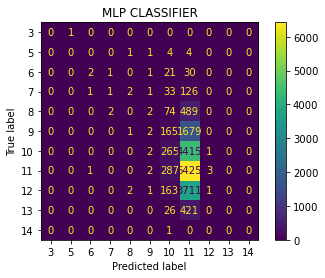

In [10]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test, y_test)
plt.title("MLP CLASSIFIER")

#### Prediction and output file

In [15]:
my_prediction=clf.predict(X_cn_test)
import re 
with open('predictions/prediction_clf.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my_prediction[ count - 1837079]))+'\n')
        count +=1


#### Première amélioration du score 
score site : 0.8583

### Without Rondom state

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_cn,y, test_size=0.2)

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),max_iter=10,alpha=1e-4,solver='sgd',verbose=10,random_state=1,learning_rate_init=.1)

In [18]:
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.52224493
Iteration 2, loss = 1.50578357
Iteration 3, loss = 1.49672811
Iteration 4, loss = 1.48717392
Iteration 5, loss = 1.47827305
Iteration 6, loss = 1.47047837
Iteration 7, loss = 1.46367660
Iteration 8, loss = 1.45777689
Iteration 9, loss = 1.45245050
Iteration 10, loss = 1.44782489


C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score : 0.379260
Test score : 0.376279
[[     0      0      2      0      0      0      0      0      0      0
       0      0      0      0]
 [     0      0      3      0      0      0      0      0      0      0
       0      0      0      0]
 [     0      0      4      0      0      3      3      0      0      0
       0      0      0      0]
 [     0      0      4      5      1      9     26      3      6      0
       0      0      0      0]
 [     0      0      3      0      3     17     78     37     61     18
       1      0      0      0]
 [     0      0      5      0      0     16    169     88    347    170
      88      0      0      0]
 [     0      0      2      1      0     18    221    190    970    853
    1006      0      0      0]
 [     0      0      0      0      0      3    181    183   1862   2851
    6374      2      0      0]
 [     0      0      0      0      0      1     71    129   2294   5981
   27382      2      0      0]
 [     0      0      0      

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.16      0.40      0.23        10
           4       0.83      0.09      0.17        54
           5       0.75      0.01      0.03       218
           6       0.24      0.02      0.03       883
           7       0.28      0.07      0.11      3261
           8       0.26      0.02      0.03     11456
           9       0.26      0.06      0.10     35860
          10       0.30      0.09      0.14     93003
          11       0.39      0.94      0.55    135222
          12       0.42      0.00      0.00     78525
          13       0.12      0.00      0.00      8897
          14       0.00      0.00      0.00        22

    accuracy                           0.38    367416
   macro avg       0.29      0.12      0.10    367416
weighted avg       0.35      0.38      0.25    367416



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'MLP CLASSIFIER')

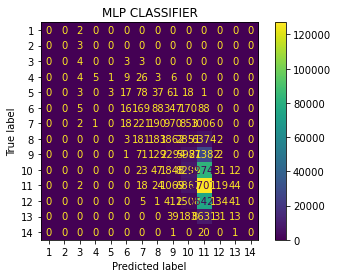

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test, y_test)
plt.title("MLP CLASSIFIER")

In [27]:
my_prediction=clf.predict(X_cn_test)
import re 
with open('predictions/prediction_clf_6.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my_prediction[ count - 1837079]))+'\n')
        count +=1


#### Deuxième amélioration du score 
score site : 0.80304178370022

### Augmentation du nombre des itérations

In [31]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),max_iter=30,alpha=1e-4,solver='sgd',verbose=10,random_state=1,learning_rate_init=.1)

In [32]:
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.52226572
Iteration 2, loss = 1.50524673
Iteration 3, loss = 1.49631730
Iteration 4, loss = 1.48770723
Iteration 5, loss = 1.47866033
Iteration 6, loss = 1.47049263
Iteration 7, loss = 1.46357160
Iteration 8, loss = 1.45794665
Iteration 9, loss = 1.45292894
Iteration 10, loss = 1.44820983
Iteration 11, loss = 1.44434662
Iteration 12, loss = 1.44062129
Iteration 13, loss = 1.43769918
Iteration 14, loss = 1.43466959
Iteration 15, loss = 1.43225517
Iteration 16, loss = 1.42999603
Iteration 17, loss = 1.42781932
Iteration 18, loss = 1.42613929
Iteration 19, loss = 1.42402113
Iteration 20, loss = 1.42260849
Iteration 21, loss = 1.42134167
Iteration 22, loss = 1.41994043
Iteration 23, loss = 1.41877531
Iteration 24, loss = 1.41748511
Iteration 25, loss = 1.41645227
Iteration 26, loss = 1.41581451
Iteration 27, loss = 1.41490759
Iteration 28, loss = 1.41396163
Iteration 29, loss = 1.41322446
Iteration 30, loss = 1.41247392


C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score : 0.389018
Test score : 0.379997
[[     0      1      1      0      0      0      0      0      0      0
       0      0      0      0]
 [     0      0      2      0      0      0      0      0      0      0
       0      0      0      0]
 [     0      0      6      0      6      0      2      0      0      0
       0      0      0      0]
 [     0      0     16      0     22      6     19      0      0      0
       0      0      0      0]
 [     0      0      5      0     44     11     96     24     15      7
       1      0      0      0]
 [     0      0      7      0     40     23    304    164    219     61
      54      0      0      0]
 [     0      1      2      0     29     18    535    379   1031    541
     770      3      0      0]
 [     0      0      1      0      4     11    526    637   2684   2284
    5159     10      0      0]
 [     0      0      0      0      0      1    260    520   4263   5703
   25137    119      3      0]
 [     0      0      0      

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.15      0.43      0.22        14
           4       0.00      0.00      0.00        63
           5       0.30      0.22      0.25       203
           6       0.33      0.03      0.05       872
           7       0.28      0.16      0.21      3309
           8       0.29      0.06      0.09     11316
           9       0.27      0.12      0.17     36006
          10       0.32      0.10      0.15     93118
          11       0.39      0.91      0.55    135431
          12       0.36      0.02      0.04     77956
          13       0.17      0.00      0.00      9087
          14       0.00      0.00      0.00        37

    accuracy                           0.38    367416
   macro avg       0.20      0.15      0.12    367416
weighted avg       0.34      0.38      0.27    367416



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
my_prediction=clf.predict(X_cn_test)
import re 
with open('predictions/prediction_clf_8.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my_prediction[ count - 1837079]))+'\n')
        count +=1


#### Troisième amélioration du score 
score site : 0.790485988634137

### Deuxième augmentation du nombre des itérations

In [35]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),max_iter=150,alpha=1e-4,solver='sgd',verbose=10,random_state=1,learning_rate_init=.1)

In [36]:
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.52226572
Iteration 2, loss = 1.50524673
Iteration 3, loss = 1.49631730
Iteration 4, loss = 1.48770723
Iteration 5, loss = 1.47866033
Iteration 6, loss = 1.47049263
Iteration 7, loss = 1.46357160
Iteration 8, loss = 1.45794665
Iteration 9, loss = 1.45292894
Iteration 10, loss = 1.44820983
Iteration 11, loss = 1.44434662
Iteration 12, loss = 1.44062129
Iteration 13, loss = 1.43769918
Iteration 14, loss = 1.43466959
Iteration 15, loss = 1.43225517
Iteration 16, loss = 1.42999603
Iteration 17, loss = 1.42781932
Iteration 18, loss = 1.42613929
Iteration 19, loss = 1.42402113
Iteration 20, loss = 1.42260849
Iteration 21, loss = 1.42134167
Iteration 22, loss = 1.41994043
Iteration 23, loss = 1.41877531
Iteration 24, loss = 1.41748511
Iteration 25, loss = 1.41645227
Iteration 26, loss = 1.41581451
Iteration 27, loss = 1.41490759
Iteration 28, loss = 1.41396163
Iteration 29, loss = 1.41322446
Iteration 30, loss = 1.41247392
Iteration 31, loss = 1.41174212
Iteration 32, los

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.50      0.50         2
           3       0.00      0.00      0.00        14
           4       0.43      0.05      0.09        63
           5       0.27      0.11      0.15       203
           6       0.23      0.01      0.02       872
           7       0.26      0.02      0.04      3309
           8       0.25      0.19      0.22     11316
           9       0.26      0.08      0.13     36006
          10       0.30      0.25      0.28     93118
          11       0.40      0.76      0.52    135431
          12       0.34      0.06      0.10     77956
          13       0.17      0.00      0.00      9087
          14       0.00      0.00      0.00        37

    accuracy                           0.37    367416
   macro avg       0.24      0.15      0.15    367416
weighted avg       0.34      0.37      0.30    367416



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'MLP CLASSIFIER')

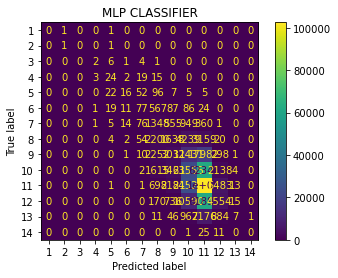

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test, y_test)
plt.title("MLP CLASSIFIER")

In [38]:
my_prediction=clf.predict(X_cn_test)
import re 
with open('predictions/prediction_clf_10.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my_prediction[ count - 1837079]))+'\n')
        count +=1

### Changement du nombre des itérations

In [39]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),max_iter=50,alpha=1e-4,solver='sgd',verbose=10,random_state=1,learning_rate_init=.1)

In [40]:
confu(clf) 

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.52226572
Iteration 2, loss = 1.50524673
Iteration 3, loss = 1.49631730
Iteration 4, loss = 1.48770723
Iteration 5, loss = 1.47866033
Iteration 6, loss = 1.47049263
Iteration 7, loss = 1.46357160
Iteration 8, loss = 1.45794665
Iteration 9, loss = 1.45292894
Iteration 10, loss = 1.44820983
Iteration 11, loss = 1.44434662
Iteration 12, loss = 1.44062129
Iteration 13, loss = 1.43769918
Iteration 14, loss = 1.43466959
Iteration 15, loss = 1.43225517
Iteration 16, loss = 1.42999603
Iteration 17, loss = 1.42781932
Iteration 18, loss = 1.42613929
Iteration 19, loss = 1.42402113
Iteration 20, loss = 1.42260849
Iteration 21, loss = 1.42134167
Iteration 22, loss = 1.41994043
Iteration 23, loss = 1.41877531
Iteration 24, loss = 1.41748511
Iteration 25, loss = 1.41645227
Iteration 26, loss = 1.41581451
Iteration 27, loss = 1.41490759
Iteration 28, loss = 1.41396163
Iteration 29, loss = 1.41322446
Iteration 30, loss = 1.41247392
Iteration 31, loss = 1.41174212
Iteration 32, los

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score : 0.390946
Test score : 0.376998
[[     0      1      1      0      0      0      0      0      0      0
       0      0      0      0]
 [     0      0      0      1      1      0      0      0      0      0
       0      0      0      0]
 [     0      0      0      0      6      0      7      1      0      0
       0      0      0      0]
 [     0      1      0      1      5      0     51      5      0      0
       0      0      0      0]
 [     0      0      0      0      3      0    107     71      0     22
       0      0      0      0]
 [     0      1      0      0      1      0    164    457      0    222
      27      0      0      0]
 [     0      0      0      0      1      0    175   1149      8   1568
     407      1      0      0]
 [     0      0      0      0      0      0    110   1892      7   5703
    3597      7      0      0]
 [     0      0      0      0      0      0     28   1822     24  14099
   19976     56      1      0]
 [     0      0      0      

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        14
           4       0.50      0.02      0.03        63
           5       0.18      0.01      0.03       203
           6       0.00      0.00      0.00       872
           7       0.27      0.05      0.09      3309
           8       0.26      0.17      0.20     11316
           9       0.29      0.00      0.00     36006
          10       0.30      0.25      0.27     93118
          11       0.40      0.83      0.54    135431
          12       0.37      0.01      0.03     77956
          13       0.14      0.00      0.00      9087
          14       0.00      0.00      0.00        37

    accuracy                           0.38    367416
   macro avg       0.19      0.10      0.09    367416
weighted avg       0.35      0.38      0.28    367416



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'MLP CLASSIFIER')

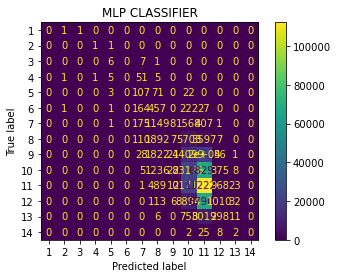

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test, y_test)
plt.title("MLP CLASSIFIER")

In [42]:
my_prediction=clf.predict(X_cn_test)
import re 
with open('predictions/prediction_clf_10.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my_prediction[ count - 1837079]))+'\n')
        count +=1


#### Quatrième amélioration du score 
score site : 0.790070111263527

### Changement du nombre des itérations


45 itérations

In [43]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),max_iter=45,alpha=1e-4,solver='sgd',verbose=10,random_state=1,learning_rate_init=.1)

In [44]:
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.52226572
Iteration 2, loss = 1.50524673
Iteration 3, loss = 1.49631730
Iteration 4, loss = 1.48770723
Iteration 5, loss = 1.47866033
Iteration 6, loss = 1.47049263
Iteration 7, loss = 1.46357160
Iteration 8, loss = 1.45794665
Iteration 9, loss = 1.45292894
Iteration 10, loss = 1.44820983
Iteration 11, loss = 1.44434662
Iteration 12, loss = 1.44062129
Iteration 13, loss = 1.43769918
Iteration 14, loss = 1.43466959
Iteration 15, loss = 1.43225517
Iteration 16, loss = 1.42999603
Iteration 17, loss = 1.42781932
Iteration 18, loss = 1.42613929
Iteration 19, loss = 1.42402113
Iteration 20, loss = 1.42260849
Iteration 21, loss = 1.42134167
Iteration 22, loss = 1.41994043
Iteration 23, loss = 1.41877531
Iteration 24, loss = 1.41748511
Iteration 25, loss = 1.41645227
Iteration 26, loss = 1.41581451
Iteration 27, loss = 1.41490759
Iteration 28, loss = 1.41396163
Iteration 29, loss = 1.41322446
Iteration 30, loss = 1.41247392
Iteration 31, loss = 1.41174212
Iteration 32, los

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (45) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score : 0.390970
Test score : 0.374796
[[     0      2      0      0      0      0      0      0      0      0
       0      0      0      0]
 [     0      0      0      0      2      0      0      0      0      0
       0      0      0      0]
 [     0      1      0      0     11      0      1      1      0      0
       0      0      0      0]
 [     0      0      0      0     48      1      8      6      0      0
       0      0      0      0]
 [     0      0      0      0     83      1     26     61     24      8
       0      0      0      0]
 [     0      2      0      0    114      1    110    236    316     65
      28      0      0      0]
 [     0      0      0      0    125      1    153    498   1419    714
     397      2      0      0]
 [     0      0      0      0     75      6    110    588   3645   3396
    3490      6      0      0]
 [     0      0      0      0     12      0     35    392   5705  10081
   19724     56      1      0]
 [     0      0      0      

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        63
           5       0.18      0.41      0.25       203
           6       0.10      0.00      0.00       872
           7       0.33      0.05      0.08      3309
           8       0.29      0.05      0.09     11316
           9       0.26      0.16      0.20     36006
          10       0.31      0.20      0.24     93118
          11       0.40      0.82      0.54    135431
          12       0.36      0.02      0.03     77956
          13       0.19      0.00      0.00      9087
          14       0.00      0.00      0.00        37

    accuracy                           0.37    367416
   macro avg       0.17      0.12      0.10    367416
weighted avg       0.34      0.37      0.29    367416



C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


100 itérations

In [65]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),max_iter=100,alpha=1e-4,solver='sgd',verbose=10,random_state=1,learning_rate_init=.1)
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.52005422
Iteration 2, loss = 1.50287042
Iteration 3, loss = 1.49276673
Iteration 4, loss = 1.48252633
Iteration 5, loss = 1.47289769
Iteration 6, loss = 1.46451216
Iteration 7, loss = 1.45758710
Iteration 8, loss = 1.45166849
Iteration 9, loss = 1.44646384
Iteration 10, loss = 1.44231912
Iteration 11, loss = 1.43837162
Iteration 12, loss = 1.43500858
Iteration 13, loss = 1.43210833
Iteration 14, loss = 1.42944198
Iteration 15, loss = 1.42705541
Iteration 16, loss = 1.42542961
Iteration 17, loss = 1.42337722
Iteration 18, loss = 1.42188297
Iteration 19, loss = 1.42037636
Iteration 20, loss = 1.41914184
Iteration 21, loss = 1.41790137
Iteration 22, loss = 1.41666264
Iteration 23, loss = 1.41547973
Iteration 24, loss = 1.41496103
Iteration 25, loss = 1.41415581
Iteration 26, loss = 1.41334119
Iteration 27, loss = 1.41261195
Iteration 28, loss = 1.41204785
Iteration 29, loss = 1.41131953
Iteration 30, loss = 1.41082423
Iteration 31, loss = 1.41013816
Iteration 32, los

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score : 0.392633
Test score : 0.380273
[[   0    1    0    0    0    0    0    0    0    0    0]
 [   0    0    0    5    4    0    1    0    0    0    0]
 [   0    0    0   18   23    0   13    1    0    0    0]
 [   0    0    0   23   73    0   49   19    0    0    0]
 [   0    0    0   19  134    2  221  191    0    0    0]
 [   0    0    0    6  172    8  589 1069    2    1    0]
 [   0    0    0    3   77    3  897 3692   10    1    0]
 [   0    0    0    0   58   10  714 5890   34   12    0]
 [   0    0    0    0    8    1  259 3569   30   11    0]
 [   0    0    0    0    0    0   31  406    6    4    0]
 [   0    0    0    0    0    0    0    0    1    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        55
           7       0.31      0.14      0.19       164
           8       0.24      0.24      0.24  

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prédiction

In [66]:
my_prediction=clf.predict(X_cn_test)
import re 
with open('predictions/prediction_clf_100.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my_prediction[ count - 1837079]))+'\n')
        count +=1


#### Cinquième amélioration du score 
score site : 0.782225052801184	

200 itérations

In [67]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),max_iter=200,alpha=1e-4,solver='sgd',verbose=10,random_state=1,learning_rate_init=.1)
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 1.52005422
Iteration 2, loss = 1.50287042
Iteration 3, loss = 1.49276673
Iteration 4, loss = 1.48252633
Iteration 5, loss = 1.47289769
Iteration 6, loss = 1.46451216
Iteration 7, loss = 1.45758710
Iteration 8, loss = 1.45166849
Iteration 9, loss = 1.44646384
Iteration 10, loss = 1.44231912
Iteration 11, loss = 1.43837162
Iteration 12, loss = 1.43500858
Iteration 13, loss = 1.43210833
Iteration 14, loss = 1.42944198
Iteration 15, loss = 1.42705541
Iteration 16, loss = 1.42542961
Iteration 17, loss = 1.42337722
Iteration 18, loss = 1.42188297
Iteration 19, loss = 1.42037636
Iteration 20, loss = 1.41914184
Iteration 21, loss = 1.41790137
Iteration 22, loss = 1.41666264
Iteration 23, loss = 1.41547973
Iteration 24, loss = 1.41496103
Iteration 25, loss = 1.41415581
Iteration 26, loss = 1.41334119
Iteration 27, loss = 1.41261195
Iteration 28, loss = 1.41204785
Iteration 29, loss = 1.41131953
Iteration 30, loss = 1.41082423
Iteration 31, loss = 1.41013816
Iteration 32, los

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [68]:
my_prediction=clf.predict(X_cn_test)
import re 
with open('predictions/prediction_clf_200.csv','w') as writefile:
    count=1837079
    writefile.write('ID,distance\n')
    while count<=3674158:
        writefile.write(str(count)+','+str(int(my_prediction[ count - 1837079]))+'\n')
        count +=1

### ONE HOT ENCODER + MinMaxScaler

In [28]:
scaler1= scaler.fit_transform(X_cn)
scaler2= scaler.fit_transform(X_cn_test)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaler1,y, test_size=0.01, random_state=42)

In [119]:
confu(clf)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train score : 0.367683
Test score : 0.365685
[[   0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0   10    0    0    0]
 [   0    0    0    0    0    0    0   55    0    0    0]
 [   0    0    0    0    0    0    0  164    0    0    0]
 [   0    0    0    0    0    0    0  567    0    0    0]
 [   0    0    0    0    0    0    0 1847    0    0    0]
 [   0    0    0    0    0    0    0 4683    0    0    0]
 [   0    0    0    0    0    0    0 6718    0    0    0]
 [   0    0    0    0    0    0    0 3878    0    0    0]
 [   0    0    0    0    0    0    0  447    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        55
           7       0.00      0.00      0.00       164
           8       0.00      0.00      0.00  

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
